In [1]:
import torch
import torchtext
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device availble for runing:")
print(device)

Device availble for runing:
cpu


In [2]:
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# #Loading the audio
# def load_audio_file(file_path):
#   input_length = 480
#   data = librosa.core.load(file_path)[0]
#   if len(data)>input_length:
#     data = data[:input_length]
#   else:
#     data = np.pad(data, (0, max(0, input_length - len(data))), "constant")
#   return data


In [ ]:
# paths=[]
# labels=[]

# for dirname, _, filenames in os.walk('/content/drive/MyDrive/RAVDESS/Audiofile'):
#   for filename in filenames:
#       path = os.path.dirname(dirname)
#       paths.append(os.path.join(dirname, filename))
#       label = filename[4:6]
#       if label == 'a':
#            #neutral
#             label = 'Angry'
#       if label == 'd':
#             #calm
#            label = 'Disgust'
#       if label == 'f':
#            #happy
#            label = 'Fear'
#       if label == 'h':
#            #fear
#           label = 'Happy'
#       if label == 'n':
#            #angry
#             label = 'Neutral'
#       if label == 'sa':
#             #sad
#            label = 'Sad'
#       if label == 'su':
#           #disgust
#          label = 'Surprised'

#       labels.append(label)


# print("Dataset is loaded")

Dataset is loaded


In [3]:
import os
import re


paths = []
labels = []
for dirname, _, filenames in os.walk("/content/drive/MyDrive/SAVEE_Dataset"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = re.split('0|1|2|3', label)[0]
        labels.append(label.lower())
    if len(paths) == 480:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/SAVEE_Dataset/DC_a06.wav,a
1,/content/drive/MyDrive/SAVEE_Dataset/DC_a01.wav,a
2,/content/drive/MyDrive/SAVEE_Dataset/DC_a04.wav,a
3,/content/drive/MyDrive/SAVEE_Dataset/DC_a03.wav,a
4,/content/drive/MyDrive/SAVEE_Dataset/DC_a02.wav,a


In [5]:
df['label'].value_counts()

label
n     120
a      60
d      60
f      60
h      60
sa     60
su     60
Name: count, dtype: int64

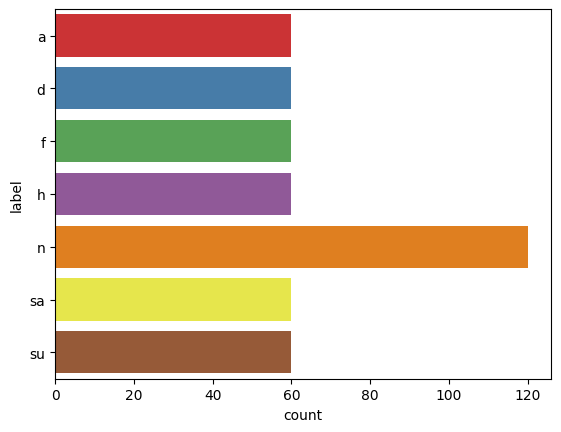

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'label' column
sns.countplot(data=df, y='label', palette='Set1')
plt.show()

In [7]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

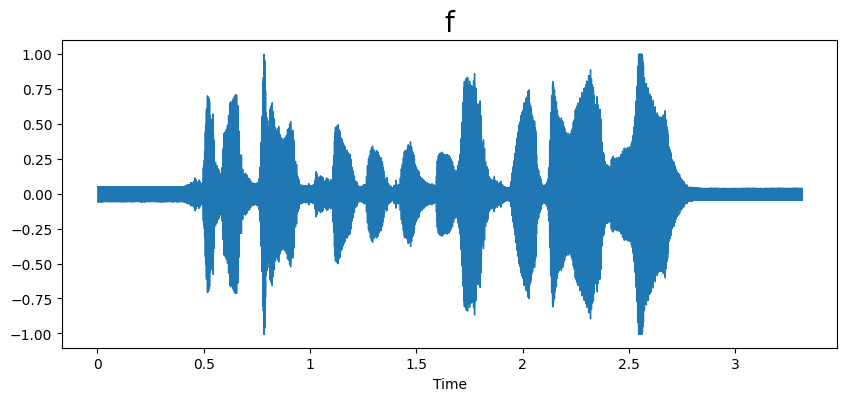

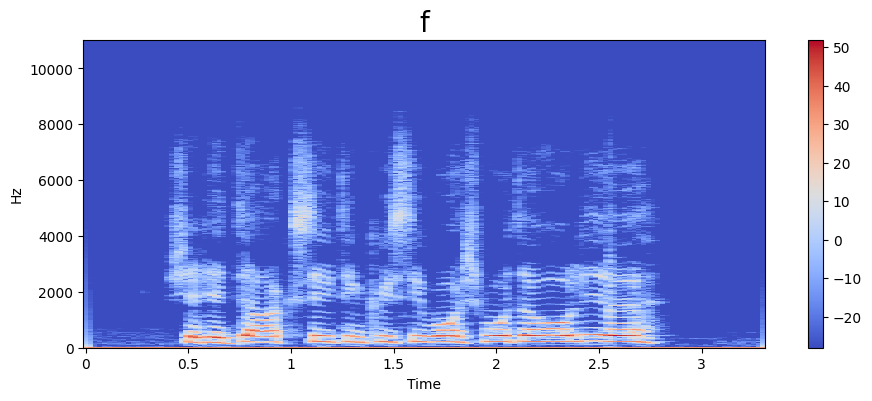

In [8]:
emotion = 'f'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

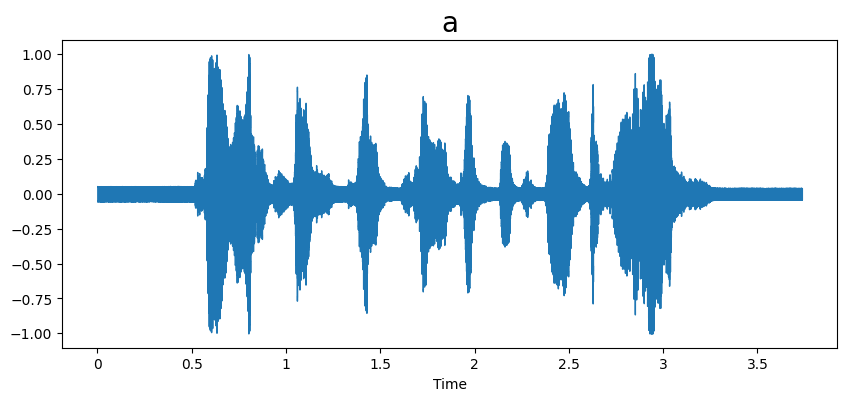

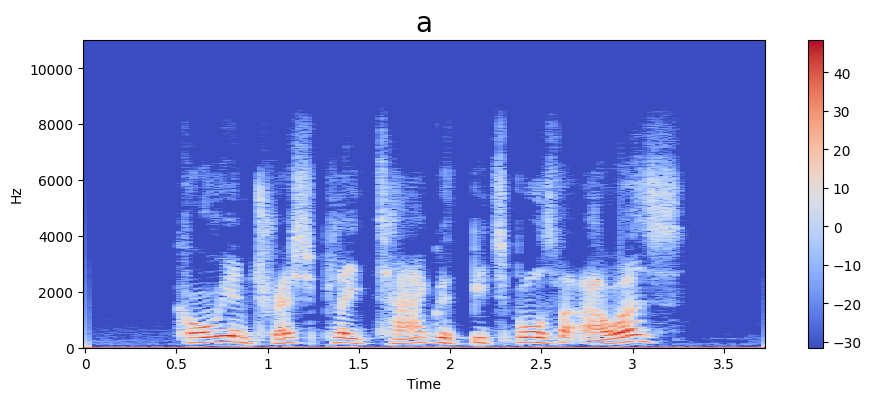

In [ ]:
emotion = 'a'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

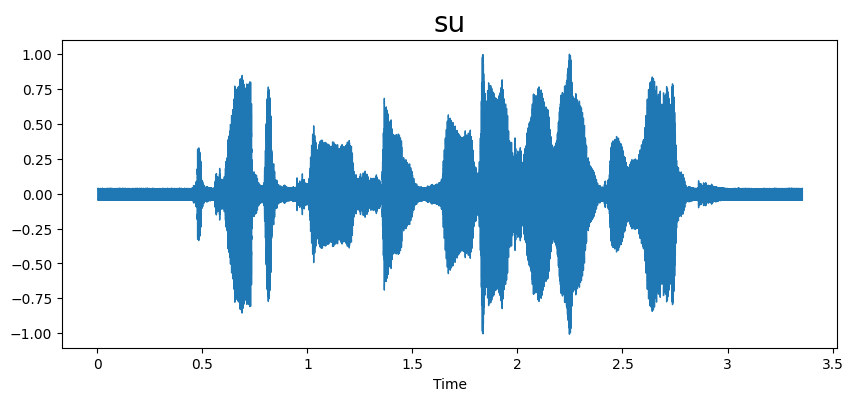

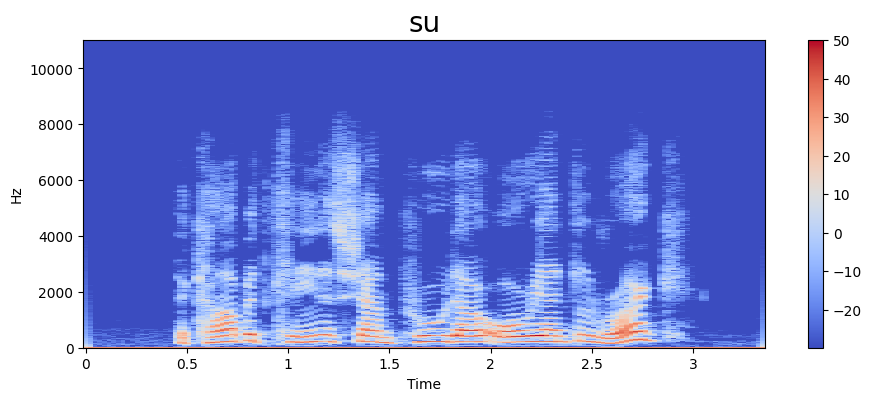

In [ ]:
emotion = 'su'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

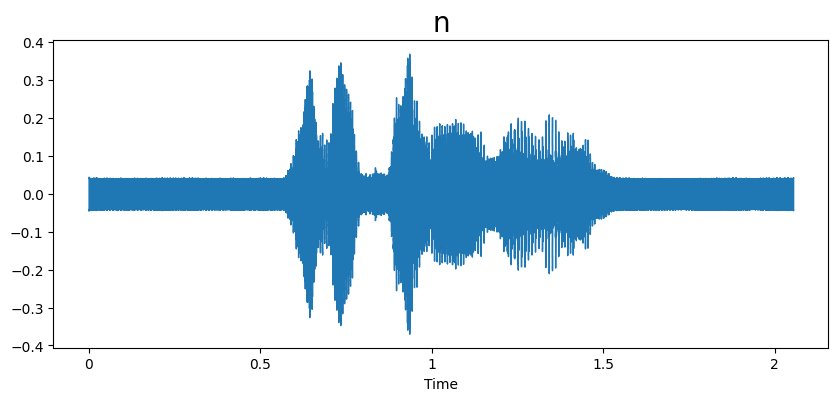

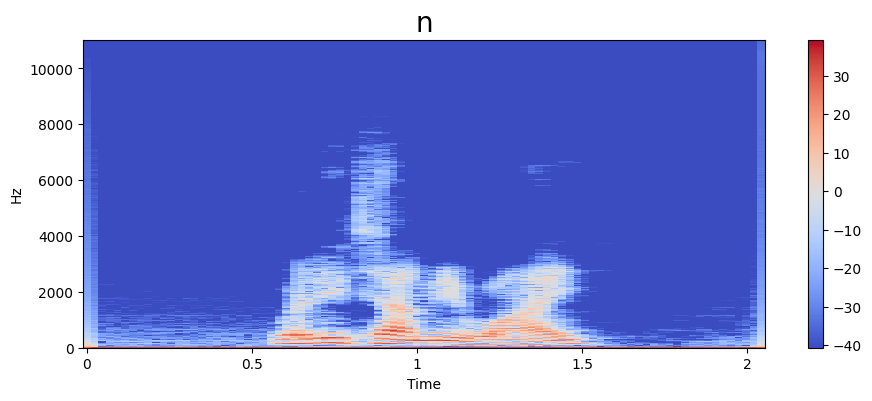

In [ ]:
emotion = 'n'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [9]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [10]:
extract_mfcc(df['speech'][0])

array([-2.6744086e+02,  1.3006436e+02, -3.0236681e+00,  2.8727848e+01,
       -1.3793417e+00, -2.1591678e+00, -2.9195770e+01, -5.0668936e+00,
       -9.7262257e-01, -1.5104843e+01,  1.2635920e+00, -4.8268655e-01,
       -3.1713324e+00, -2.6041653e+00,  3.7610347e+00,  3.0327635e-02,
       -3.2857404e+00,  5.1897488e+00, -2.8975561e+00, -3.2809131e+00,
       -1.0705279e-01, -2.7361894e+00,  2.9862905e+00, -4.0494232e+00,
       -1.4189047e+00, -3.2203918e+00, -3.8179350e+00,  2.0349402e+00,
       -1.7398697e+00, -2.4278776e-01, -5.6192285e-01,  2.9295704e-01,
        3.7457639e-01,  1.4141564e+00,  3.7576270e+00,  5.9632611e+00,
        6.0157499e+00,  8.2100058e+00,  8.9938993e+00,  6.4764590e+00],
      dtype=float32)

In [11]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [12]:
X_mfcc

0      [-267.44086, 130.06436, -3.023668, 28.727848, ...
1      [-286.4318, 128.34483, 10.662353, 33.634502, 1...
2      [-259.2938, 119.53638, 3.1149037, 16.472427, 6...
3      [-290.49103, 118.30857, -4.7429476, 27.052511,...
4      [-269.42822, 136.77188, -15.110327, 17.623636,...
                             ...                        
475    [-570.5872, 119.1238, 31.303696, 36.690304, 12...
476    [-529.016, 131.75406, 25.293446, 39.819622, 14...
477    [-532.4664, 117.43544, 10.704868, 30.815432, 0...
478    [-531.93134, 113.948814, 19.89846, 24.734169, ...
479    [-555.82416, 117.216835, 26.249662, 47.466187,...
Name: speech, Length: 480, dtype: object

In [13]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(480, 40)

In [14]:
X = np.expand_dims(X, -1)
X.shape

(480, 40, 1)

In [15]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [16]:
y = y.toarray()

In [17]:
y.shape

(480, 7)

In [18]:
import tensorflow as tf
# import tensorflow.keras
from tensorflow import keras
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
#from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers import rmsprop_v2
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import LSTM,Masking,concatenate,AveragePooling1D, BatchNormalization

In [19]:
from keras.layers import SimpleRNN
model = Sequential([
    SimpleRNN(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [20]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
6/6 [==============================] - 2s 110ms/step - loss: 1.8255 - accuracy: 0.2656 - val_loss: 2.2226 - val_accuracy: 0.0521
Epoch 2/50
6/6 [==============================] - 0s 45ms/step - loss: 1.4908 - accuracy: 0.3750 - val_loss: 2.5076 - val_accuracy: 0.0417
Epoch 3/50
6/6 [==============================] - 0s 44ms/step - loss: 1.3356 - accuracy: 0.4479 - val_loss: 2.8585 - val_accuracy: 0.0417
Epoch 4/50
6/6 [==============================] - 0s 43ms/step - loss: 1.3628 - accuracy: 0.4245 - val_loss: 2.8036 - val_accuracy: 0.0729
Epoch 5/50
6/6 [==============================] - 0s 45ms/step - loss: 1.2113 - accuracy: 0.5052 - val_loss: 3.4637 - val_accuracy: 0.0417
Epoch 6/50
6/6 [==============================] - 0s 45ms/step - loss: 1.1671 - accuracy: 0.5130 - val_loss: 3.4848 - val_accuracy: 0.0312
Epoch 7/50
6/6 [==============================] - 0s 49ms/step - loss: 1.0712 - accuracy: 0.5859 - val_loss: 4.3892 - val_accuracy: 0.0312
Epoch 8/50
6/6 [==========

In [21]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
print(X1_train.shape)
print(y1_train.shape)

(384, 40, 1)
(384, 7)


In [24]:
# Importing necessary libraries
from sklearn.model_selection import KFold
import numpy as np

# Initializing KFold
FOLDS = 5
kf = KFold(n_splits=FOLDS)

# Initializing a list to store accuracy values
test_accuracy_scores = []

# Iterating over folds
for i, (train, test) in enumerate(kf.split(X1_train, y1_train)):
    X_train_kf = X1_train[train]
    y_train_kf = y1_train[train]
    X_test_kf = X1_train[test]
    y_test_kf = y1_train[test]

    # Training the model
    history = model.fit(X_train_kf, y_train_kf,
                        batch_size=16,
                        epochs=30,
                        validation_data=(X_test_kf, y_test_kf))

    # Evaluating the model on test data
    test_loss, test_accuracy = model.evaluate(X1_test, y1_test)
    test_accuracy_scores.append(test_accuracy)

Epoch 1/30
20/20 [==============================] - 2s 31ms/step - loss: 2.0810 - accuracy: 0.5114 - val_loss: 2.0542 - val_accuracy: 0.3506
Epoch 2/30
20/20 [==============================] - 1s 30ms/step - loss: 1.5431 - accuracy: 0.4625 - val_loss: 1.5021 - val_accuracy: 0.3636
Epoch 3/30
20/20 [==============================] - 1s 29ms/step - loss: 1.3897 - accuracy: 0.4365 - val_loss: 1.3075 - val_accuracy: 0.4675
Epoch 4/30
20/20 [==============================] - 1s 29ms/step - loss: 1.0915 - accuracy: 0.5570 - val_loss: 1.1413 - val_accuracy: 0.5584
Epoch 5/30
20/20 [==============================] - 1s 32ms/step - loss: 0.8953 - accuracy: 0.6482 - val_loss: 1.1298 - val_accuracy: 0.5065
Epoch 6/30
20/20 [==============================] - 1s 28ms/step - loss: 1.0035 - accuracy: 0.6384 - val_loss: 1.4498 - val_accuracy: 0.4545
Epoch 7/30
20/20 [==============================] - 0s 21ms/step - loss: 0.8826 - accuracy: 0.6645 - val_loss: 1.1159 - val_accuracy: 0.4675
Epoch 8/30
20

In [25]:
# Printing the mean accuracy over all folds
print("Mean accuracy of the trained model on the test data: {:.2f}%".format(np.mean(test_accuracy_scores) * 100))

Mean accuracy of the trained model on the test data: 64.79%


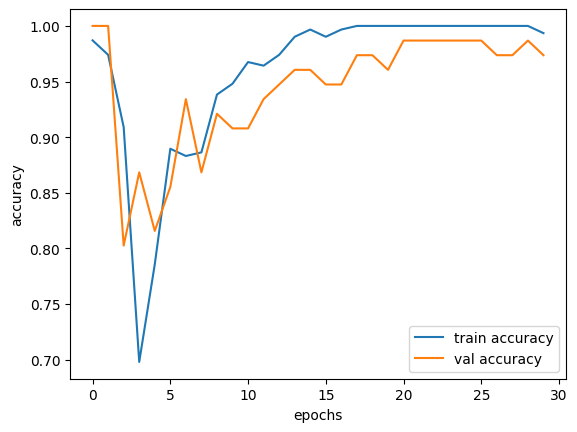

In [26]:
#Accuracy of model
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

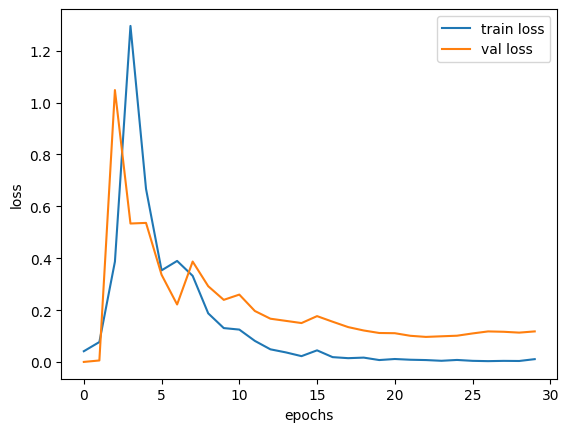

In [27]:
#Loss of model
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test_kf)

class_names= np.argmax(predictions, axis=1)
new_Ytest = np.argmax(y_test_kf, axis=1)

report = classification_report(new_Ytest, class_names)
print(report)
# In[30]:
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test_kf, steps=len(X_test_kf), verbose=0)
y_true=np.argmax(new_Ytest, axis=-1)

cm = confusion_matrix(new_Ytest, class_names)
print(cm)

3/3 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        12
           3       0.92      1.00      0.96        11
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        11
           6       1.00      0.82      0.90        11

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.98      0.97      0.97        76

[[ 7  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0 12  0  0  0  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  0  0 15  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  1  0  1  0  0  9]]


In [ ]:
test_paths = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/SAVEE_Dataset'):
    for filename in filenames:
        test_path = os.path.dirname(dirname)
        test_paths.append(os.path.join(dirname, filename))

In [ ]:
# adding to dataframe
df_test = pd.DataFrame()
df_test['test_speech'] = test_paths
df_test.head()

,test_speech
0,/content/drive/MyDrive/SAVEE_Dataset/DC_a06.wav
1,/content/drive/MyDrive/SAVEE_Dataset/DC_a01.wav
2,/content/drive/MyDrive/SAVEE_Dataset/DC_a04.wav
3,/content/drive/MyDrive/SAVEE_Dataset/DC_a03.wav
4,/content/drive/MyDrive/SAVEE_Dataset/DC_a02.wav


In [ ]:
#extracting feature
extract_mfcc(df_test['test_speech'][0])

array([-2.6744086e+02,  1.3006436e+02, -3.0236681e+00,  2.8727848e+01,
       -1.3793417e+00, -2.1591678e+00, -2.9195770e+01, -5.0668936e+00,
       -9.7262257e-01, -1.5104843e+01,  1.2635920e+00, -4.8268655e-01,
       -3.1713324e+00, -2.6041653e+00,  3.7610347e+00,  3.0327635e-02,
       -3.2857404e+00,  5.1897488e+00, -2.8975561e+00, -3.2809131e+00,
       -1.0705279e-01, -2.7361894e+00,  2.9862905e+00, -4.0494232e+00,
       -1.4189047e+00, -3.2203918e+00, -3.8179350e+00,  2.0349402e+00,
       -1.7398697e+00, -2.4278776e-01, -5.6192285e-01,  2.9295704e-01,
        3.7457639e-01,  1.4141564e+00,  3.7576270e+00,  5.9632611e+00,
        6.0157499e+00,  8.2100058e+00,  8.9938993e+00,  6.4764590e+00],
      dtype=float32)

In [ ]:
X_mfcc_test = df_test['test_speech'].apply(lambda x_test: extract_mfcc(x_test))

In [ ]:
X_test = [x_test for x_test in X_mfcc_test]
X_test = np.array(X_test)
X_test.shape

(480, 40)

In [ ]:
X_test = np.expand_dims(X_test, -1)
X_test.shape

(480, 40, 1)

In [ ]:
#predicting test data result
predictions = model.predict(X_test, batch_size = 32, verbose = 0)

In [ ]:
for prediction in predictions:
    print(prediction)

[0.31288677 0.27241182 0.08624622 0.10148157 0.00501979 0.18410532
 0.03784854]
[0.37877622 0.18642592 0.07674836 0.18870075 0.01487281 0.07784347
 0.07663242]
[0.15604246 0.15305749 0.06910158 0.09995302 0.34172288 0.1219382
 0.05818431]
[1.6450010e-01 3.9067060e-02 1.9787532e-01 2.6840279e-01 2.3498433e-04
 1.8727948e-01 1.4264029e-01]
[0.13204546 0.16411869 0.05003002 0.04200765 0.42127964 0.18033232
 0.0101862 ]
[0.15258281 0.15391833 0.06495625 0.0751297  0.37446478 0.1435926
 0.03535554]
[0.18140084 0.17271498 0.04281334 0.10112546 0.38158906 0.07494286
 0.04541342]
[0.18467289 0.17491445 0.06988329 0.12851556 0.27986518 0.08544365
 0.07670502]
[0.19781022 0.18129265 0.06384827 0.1332644  0.27388188 0.07141116
 0.07849126]
[0.23607102 0.21137968 0.06565253 0.139427   0.19900855 0.06631499
 0.08214626]
[0.2137432  0.20960549 0.1394143  0.08850376 0.00375302 0.30839393
 0.03658631]
[7.8161053e-02 2.2265397e-02 1.5638223e-01 4.6789609e-02 3.2328890e-06
 6.8433386e-01 1.2064663e-02]
